In [6]:
import matplotlib.pyplot as plt
import numpy as np

sin = np.sin
cos = np.cos
pi = np.pi
pi_sqrd = pi**2

nz = 200; ny = 200

z = np.linspace(0, 1, nz)
y = np.linspace(0, 1, ny)
f = np.zeros((nz, ny))
ddf_ddy = np.zeros((nz, ny))

dy = 1/(ny-1)
one_over_dydy = 1/dy**2

for i in range(nz):
    for j in range(ny):
        f[i,j] = sin(4.0*pi*z[i])*sin(2*pi*y[j])
        ddf_ddy[i,j] = -4.0*pi_sqrd*sin(4.0*pi*z[i])*sin(2*pi*y[j])

In [7]:
def central_second_derivative_y_2D_numpy(array, one_over_dydy):
    j_plus = np.roll(array, -1, axis=1)
    j_minus = np.roll(array, 1, axis=1)

    return (j_plus - 2.0*array + j_minus) * one_over_dydy

def central_second_derivative_y_2D_C(array, i, j, one_over_dydy):
    return (array[i, j+1] - 2.0*array[i, j] + array[i, j-1]) * one_over_dydy

In [8]:
ddf_ddy_numpy = np.zeros((nz,ny))
ddf_ddy_C = np.zeros((nz,ny))

for i in range(nz):
    for j in range(1,ny-1):
        ddf_ddy_C[i][j] = central_second_derivative_y_2D_C(f, i, j, one_over_dydy)

ddf_ddy_numpy = central_second_derivative_y_2D_numpy(f, 1/dy**2)

In [18]:
np.max(diff_C)- np.max(diff_numpy)

0.0

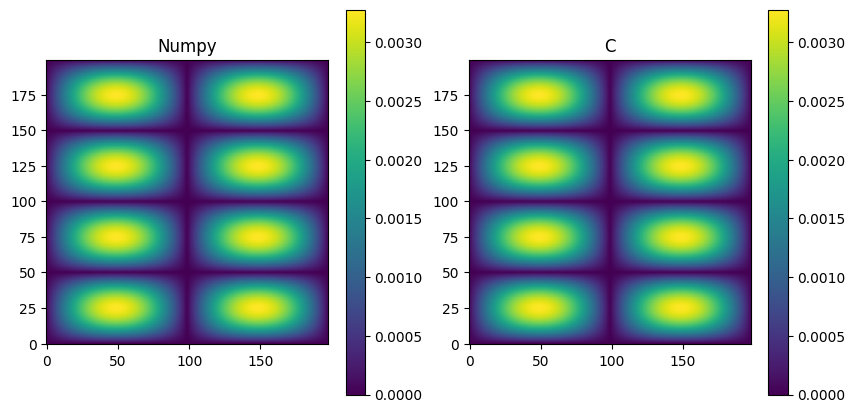

In [13]:
diff_numpy = (np.abs(ddf_ddy_numpy-ddf_ddy))[:,1:-1]
diff_C = (np.abs(ddf_ddy_C-ddf_ddy))[:,1:-1]

# Create figure
fig, ax = plt.subplots(1,2, figsize=(10,5))
# Plot the data
im0 = ax[0].imshow(diff_numpy, origin='lower')
im1 = ax[1].imshow(diff_C, origin='lower')
# Create colorbars
cbar0 = fig.colorbar(im0, ax=ax[0])
cbar1 = fig.colorbar(im1, ax=ax[1])
# Set titles
ax[0].set_title('Numpy')
ax[1].set_title('C')
# Show the figure
plt.show()